# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [149]:
# Import your libraries:
#%%
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [62]:
websites = pd.read_csv('../website.csv')
pil_im = Image.open('../clz.png')
spidey_instinct = Image.open('../spidey.jpg')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

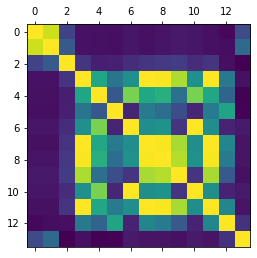

In [63]:
# Your code here
plt.matshow(websites.corr())
plt.show()

Data Description:

URL: it is the anonimous identification of the URL analyzed in the study

URL_LENGTH: it is the number of characters in the URL

NUMBERSPECIALCHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”

CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).

SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.

CONTENT_LENGTH: it represents the content size of the HTTP header.

WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).

WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).

WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM

WHOISUPDATEDDATE: Through the Whois we got the last update date from the server analyzed

TCPCONVERSATIONEXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client

DISTREMOTETCP_PORT: it is the number of the ports detected and different to TCP

REMOTE_IPS: this variable has the total number of IPs connected to the honeypot

APP_BYTES: this is the number of bytes transfered

SOURCEAPPPACKETS: packets sent from the honeypot to the server

REMOTEAPPPACKETS: packets received from the server

APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server

DNSQUERYTIMES: this is the number of DNS packets generated during the communication between the honeypot and the server

TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


In [64]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [65]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [66]:
websites.corrwith(websites.Type).sort_values(ascending=False)

Type                         1.000000
NUMBER_SPECIAL_CHARACTERS    0.280897
URL_LENGTH                   0.162104
DNS_QUERY_TIMES              0.068753
REMOTE_APP_BYTES            -0.011004
APP_BYTES                   -0.011262
REMOTE_APP_PACKETS          -0.032897
APP_PACKETS                 -0.034414
SOURCE_APP_PACKETS          -0.034414
TCP_CONVERSATION_EXCHANGE   -0.040202
SOURCE_APP_BYTES            -0.043852
REMOTE_IPS                  -0.078783
DIST_REMOTE_TCP_PORT        -0.082925
CONTENT_LENGTH              -0.090852
dtype: float64

In [67]:
# Your comment here
# Se realizara limpieza de dataframe tratando de conservar la mayor información posible.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [68]:
# Your code here
#%%
#Obtenemos la lista de correlaciones por cada variable, ordenada y sin duplicados
web_corr = websites.copy()
web_corr = websites.corr().unstack().sort_values(kind='quicksort', ascending=False).drop_duplicates().head(60)
web_corr

Type                       Type                         1.000000
REMOTE_APP_BYTES           APP_BYTES                    0.999992
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
SOURCE_APP_BYTES           REMOTE_APP_PACKETS           0.880555
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_BYTES             0.865580
SOURCE_APP_BYTES           APP_PACKETS                  0.857495
REMOTE_APP_BYTES           DIST_REMOTE_TCP_PORT         0.781212
APP_BYTES                  DIST_REMOTE_TCP_PORT         0.780238
REMOTE_APP_PACKETS         DIST_REMOTE_TCP_PORT         0.591188
DIST_REMOTE_TCP_PORT       APP_PACKETS                  0.558612
TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT         0.555188
REMOTE_IPS                 DNS_QUERY_TIMES              0.548189
REMOTE_APP_PACKETS       

In [69]:
# Your comment here
#%%
#En la lista que imprimimos arriba se muestra las variables con colinearidad > 90 %, el experimento siguiente consiste en jugar con las variables a remover, pera intentar mantener la mayoría de columnas posibles.

web_corr.head(7)

Type                Type                         1.000000
REMOTE_APP_BYTES    APP_BYTES                    0.999992
SOURCE_APP_PACKETS  TCP_CONVERSATION_EXCHANGE    0.997796
REMOTE_APP_PACKETS  TCP_CONVERSATION_EXCHANGE    0.990848
APP_PACKETS         REMOTE_APP_PACKETS           0.989285
URL_LENGTH          NUMBER_SPECIAL_CHARACTERS    0.917986
SOURCE_APP_BYTES    REMOTE_APP_PACKETS           0.880555
dtype: float64

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

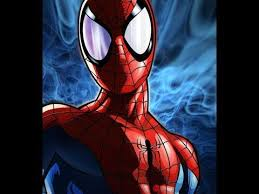

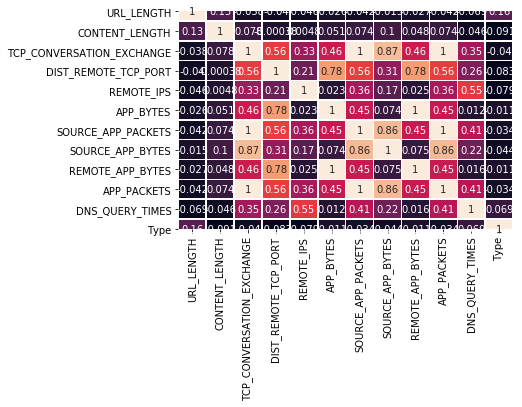

In [70]:
#%%

#Mi instinto de ingeniero en Sistemas piensa que REMOTE_APP_BYTES Y APP_BYTES, pueden ser la misma basura, TCP_CONVERSATION_EXCANGE esta muy ligado a SOURCE/REMOTE APP PACKETS, porque TCP = Transfer Control Protocol y se encarga de controlar paquetes, APP_PACKETS y REMOTE_APP_PACKETS igual son la misma basura.

#Dicho lo anterior a las pruebas me remito.

display(spidey_instinct)
#print(websites.corr().unstack().sort_values(kind='quicksort', ascending=False).drop_duplicates().head(7))

              #############
              ##TEST AREA##
              #############
              
#ROUND2: SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, NUMBER_SPECIAL_CHARACTERS

sns.heatmap(websites[['URL', 'URL_LENGTH', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']].corr(), annot=True, linewidths=.5,cbar=False);

In [71]:
# Your comment here
# Quitando 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'NUMBER_SPECIAL_CHARACTERS', se obtiene una buena matriz con valores dentro de los parámetros, así que dropeamos el dataframe websites.

In [72]:
# Print heatmap again
#%%
try:
    websites.drop(columns=['SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'NUMBER_SPECIAL_CHARACTERS'], axis=1, inplace=True)
except:
    sns.heatmap(websites.corr(), annot=True, linewidths=.5,cbar=False,vmin=0, vmax=1);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [73]:
# Your code here
#%%
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [74]:
# Your code here
#%%
websites.dropna(axis=0, inplace=True)
websites.reset_index(drop=True)

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,B0_62,160,UTF-8,None,36829.0,US,CA,14/08/1997 0:00,14/06/2016 0:00,19,3,7,2402,4491,2900,25,6.0,0
963,B0_2237,161,iso-8859-1,Apache/2.4.18 (Ubuntu),417.0,None,None,23/11/2010 0:00,20/11/2015 0:00,7,7,2,582,752,582,7,0.0,0
964,B0_156,183,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,22,2,7,2062,8161,2742,30,8.0,0
965,B0_162,201,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,132181,6945,87,4.0,0


In [75]:
# Your comment here
# No quedaban muchos valores nulos, por lo que se quita el registro completo de el dataframe

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [76]:
# Examine missing values in each column
#%%
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [77]:
# Your code here
#websites.WHOIS_COUNTRY.unique()     #[13] "[u'GB'; u'UK']"
#%%
websites.replace(to_replace=['UK','United Kingdom',"[u'GB'; u'UK']"], value='GB', inplace=True)

In [78]:
#%%
websites.replace(to_replace=['Cyprus'], value='CY', inplace=True)
websites.reset_index(drop=True, level=0, inplace=True)

In [79]:
#%%
websites.WHOIS_COUNTRY.value_counts()

US      589
None    208
CA       45
GB       27
AU       16
PA       10
IN        6
CH        6
JP        6
AT        4
TR        3
CN        3
FR        3
KR        3
DE        2
HK        2
CY        2
IL        2
NO        2
BE        2
BR        2
UY        2
BS        2
SC        2
NL        2
UA        2
us        2
PH        1
SI        1
RU        1
AE        1
SE        1
se        1
IT        1
CZ        1
KY        1
IE        1
BY        1
UG        1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

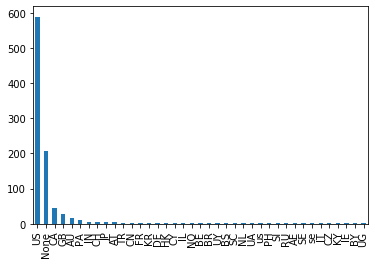

In [80]:
# Your code here
#%%
websites.WHOIS_COUNTRY.value_counts().plot.bar();

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [81]:
# Your code here
#%%
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.upper()
top10 = ['US','NONE','CA','ES','GB','AU','PA','JP','CN','IN']

for x in range(len(websites.WHOIS_COUNTRY)):
    if websites.WHOIS_COUNTRY[x] in top10:
        continue#print('Es top10')
    else:
        websites.WHOIS_COUNTRY[x] = 'OTHER' 

In [82]:
websites.WHOIS_COUNTRY.value_counts()

US       591
NONE     208
OTHER     55
CA        45
GB        27
AU        16
PA        10
JP         6
IN         6
CN         3
Name: WHOIS_COUNTRY, dtype: int64

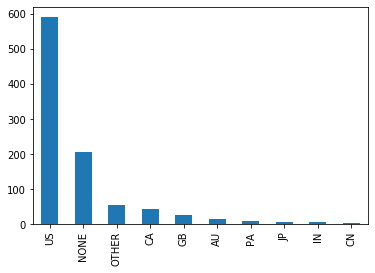

In [83]:
#%%
websites.WHOIS_COUNTRY.value_counts().plot.bar();

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [84]:
#%%
websites.to_csv('lapruebita.csv')

In [85]:
#%%
try:
    websites.drop(columns=['WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis=1, inplace=True)
except:
    print(websites.keys())

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


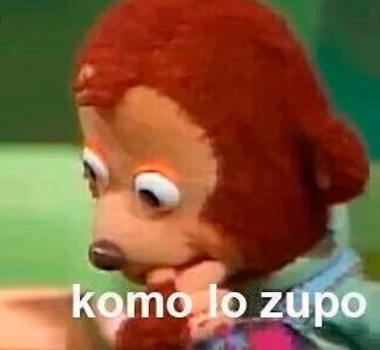

In [86]:
# Your code here
#%%
print(websites.dtypes)
display(pil_im)

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [87]:
# Your code here
#%%
try:
    websites.drop(columns=['URL'], axis=1, inplace=True)
except:
    print(websites.keys())

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [88]:
#%%
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [89]:
# Your code here
#%%
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'nginx/1.6.2', 'Heptu web server',
       'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.22 (Debian)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'Apache/2.2.27 (CentOS)', 'CherryPy/3.6.0',
       'Apache/2.2.15 (CentOS)', 'KHL',
   

![Think Hard](../think-hard.jpg)

In [90]:
# Your comment here
#Ya había pensado en algo como clasificarlo por el S.O del servidor o su programa gestor.


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [91]:
#Your code here:
#%%
for x in range(len(websites.SERVER)):
    if 'pache' in websites.SERVER[x]:
        websites.SERVER[x] = 'Apache'
    elif 'ATS' in websites.SERVER[x]:
        websites.SERVER[x] = 'Apache'
    elif 'crosoft' in websites.SERVER[x]:
        websites.SERVER[x] = 'Microsoft'
    elif 'ginx' in websites.SERVER[x]:
        websites.SERVER[x] = 'Nginx'
    elif 'openresty' in websites.SERVER[x]:
        websites.SERVER[x] = 'Nginx'
    else:
        websites.SERVER[x] = 'Other'

#websites.reset_index(drop=True, level=0, inplace=True)
websites.SERVER.unique()

array(['Nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [92]:
# Count `SERVER` value counts here
#%%
websites.SERVER.value_counts()

Apache       414
Other        206
Microsoft    180
Nginx        167
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [93]:
# Your code here
#%%
website_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [122]:
# Your code here
#%%
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 30 columns):
URL_LENGTH                   967 non-null int64
CONTENT_LENGTH               967 non-null float64
TCP_CONVERSATION_EXCHANGE    967 non-null int64
DIST_REMOTE_TCP_PORT         967 non-null int64
REMOTE_IPS                   967 non-null int64
APP_BYTES                    967 non-null int64
SOURCE_APP_BYTES             967 non-null int64
REMOTE_APP_BYTES             967 non-null int64
APP_PACKETS                  967 non-null int64
DNS_QUERY_TIMES              967 non-null float64
Type                         967 non-null int64
CHARSET_ISO-8859-1           967 non-null uint8
CHARSET_None                 967 non-null uint8
CHARSET_UTF-8                967 non-null uint8
CHARSET_iso-8859-1           967 non-null uint8
CHARSET_us-ascii             967 non-null uint8
CHARSET_utf-8                967 non-null uint8
CHARSET_windows-1251         967 non-null uint8
SERVER_Microsoft           

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [132]:
#%%
# Your code here:
X = website_dummy.drop('Type', axis=1)

y = websites.Type

In [133]:
#%%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [134]:
# Your code here:
#%%
modelo_log_regression = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [135]:
# Your code here:
#%%
modelo_log_regression.fit(X_train, y_train)

print(f" Coheficientes:  {modelo_log_regression.coef_}")
print(f" Intercepcion:  {modelo_log_regression.intercept_}")

Coheficientes:  [[-3.74672180e-02 -1.12619067e-04 -2.52703367e-02 -4.91400821e-01
  -1.26763714e-01 -1.90017296e-03 -5.23519400e-05  1.89138444e-03
   1.04587686e-01  1.73881610e-01  1.85446089e-01 -1.73434562e-02
   6.67679199e-01 -5.13049448e-01 -3.98597445e-01 -5.95941004e-01
   1.13558630e-01 -4.81341293e-01  9.15632034e-01 -5.32567647e-01
  -2.21394446e-03  7.64632892e-02  7.56312101e-02 -8.59730104e-02
  -3.33340689e-02  1.97647289e-01  1.74086656e-01 -7.36786411e-02
  -7.81107977e-01]]
 Intercepcion:  [-0.59914817]


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [146]:
# Your code here:
#%%
y_pred = modelo_log_regression.predict(X_test)

print('CONFUSION MATRIX con Regresion logística:')
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------')
print('Akiuraci_escor',accuracy_score(y_test, y_pred))

CONFUSION MATRIX con Regresion logística:
[[162   3]
 [ 12  17]]
-----------------------------------
Akiuraci_escor 0.9226804123711341


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
#El modelo arroja un accuracy suficientemente bueno para muchas aplicaciones, eso o se sobreejercitó y solo esta adivinando que sitios son buenos/malos del Dataframe. :/


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [140]:
# Your code here:
#%%
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [145]:
# Your code here:
#%%
y_predKNN = KNN.predict(X_test)


print('CONFUSION MATRIX con KNN:')
print(confusion_matrix(y_test, y_predKNN))
print('-----------------------------------')
print('Akiuraci_escor',accuracy_score(y_test, y_predKNN))

CONFUSION MATRIX con KNN:
[[161   4]
 [ 14  15]]
-----------------------------------
Akiuraci_escor 0.9072164948453608


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [147]:
# Your code here:
#%%
KNN_2 = KNeighborsClassifier(n_neighbors=5)
KNN_2.fit(X_train, y_train)

y_predict_KNN_2 = KNN_2.predict(X_test)

print('CONFUSION MATRIX con KNN(k=5):')
print(confusion_matrix(y_test, y_predict_KNN_2))
print('-----------------------------------')
print('Akiuraci_escor',accuracy_score(y_test, y_predict_KNN_2))

CONFUSION MATRIX con KNN(k=5):
[[162   3]
 [ 14  15]]
-----------------------------------
Akiuraci_escor 0.9123711340206185


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:
#Mejoró en poco, aunque se llevan muy poca diferencia entre ellos, Regresión Lógistica me dió mejores SCORES que mis 2 pruebas con KNN. No wonder why...


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [155]:
# Your code here
#%%
robScaler = RobustScaler().fit(X_train, y_train)

X_train_sayayin = robScaler.transform(X_train)
X_test_sayayin = robScaler.transform(X_test)

modelo_log_regression.fit(X_train_sayayin, y_train)

print(f" Coheficientes:  {modelo_log_regression.coef_}")
print(f" Intercepcion:  {modelo_log_regression.intercept_}")
print('-----------------------------------')
y_pred_sayayin = modelo_log_regression.predict(X_test_sayayin)

print('CONFUSION MATRIX con Regresion logística datos SAYAYIN:')
print(confusion_matrix(y_test, y_pred_sayayin))
print('-----------------------------------')
print('Akiuraci_escor',accuracy_score(y_test, y_pred_sayayin))





Coheficientes:  [[-0.66360169 -0.95543688  0.62609063 -1.73160263 -0.32123032 -0.0320338
  -0.4578449   0.21141001  0.95062828  1.32610989 -0.17869664 -0.06272847
   0.22491985 -0.85659124 -0.39104431 -1.44557383  0.71672351 -0.76276081
   0.91581097 -1.03874377  0.07664123  0.40584111  0.39926359 -0.28693383
  -0.15811155  0.3437188   0.4571581  -0.31924875 -0.29910846]]
 Intercepcion:  [-2.35382402]
-----------------------------------
CONFUSION MATRIX con Regresion logística datos SAYAYIN:
[[163   2]
 [ 15  14]]
-----------------------------------
Akiuraci_escor 0.9123711340206185
